### **Dataset Specification**

***Link:*** https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

**Diabetes_012:** 0 = no diabetes / 1 = prediabetes / 2 = diabetes

**HighBP:** 0 = no high BP / 1 = high BP

**HighChol:** 0 = no high cholesterol / 1 = high cholesterol

**CholCheck:** 0 = no cholesterol check in 5 years / 1 = yes cholesterol check in 5 years

**BMI:** Body Mass Index

**Smoker:** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no / 1 = yes

**Stroke:** (Ever told) you had a stroke. 0 = no / 1 = yes

**HeartDiseaseorAttack:** coronary heart disease (CHD) or myocardial infarction (MI) 0 = no / 1 = yes

**PhysActivity:** physical activity in past 30 days - not including job 0 = no / 1 = yes

**Fruits:** Consume Fruit 1 or more times per day 0 = no / 1 = yes

**Veggies:** Consume Vegetables 1 or more times per day 0 = no / 1 = yes

**HvyAlcoholConsump:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no / 1 = yes

**AnyHealthcare:** Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no / 1 = yes

**NoDocbcCost:** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no / 1 = yes

**GenHlth:** Would you say that in general your health is: scale 1-5 / 1 = excellent / 2 = very good / 3 = good / 4 = fair / 5 = poor

**MentHlth:** Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how

**PhysHlth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

**DiffWalk:** Do you have serious difficulty walking or climbing stairs? 0 = no / 1 = yes

**Sex:** 0 = female / 1 = male

**Age:** 13-level age category (_AGEG5YR see codebook) 1 = 18-24 / 9 = 60-64 / 13 = 80 or older

**Education:** Education level (EDUCA see codebook) scale 1-6 / 1 = Never attended school or only kindergarten / 2 = Grades 1 through 8

**Income:** Income scale (INCOME2 see codebook) scale 1-8 / 1 = less than $10,000 / 5 = less than $35,000 / 8 = $75,000 or more

### **EDA - Univariate & Multivariate Analysis**

In [1]:
# Behnam: I add this section to read the .csv file directly after uploading in "Files".

# Read the dataset and review the main information
import pandas as pd
df = pd.read_csv("diabetes.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253679,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253680,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253681,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253682,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

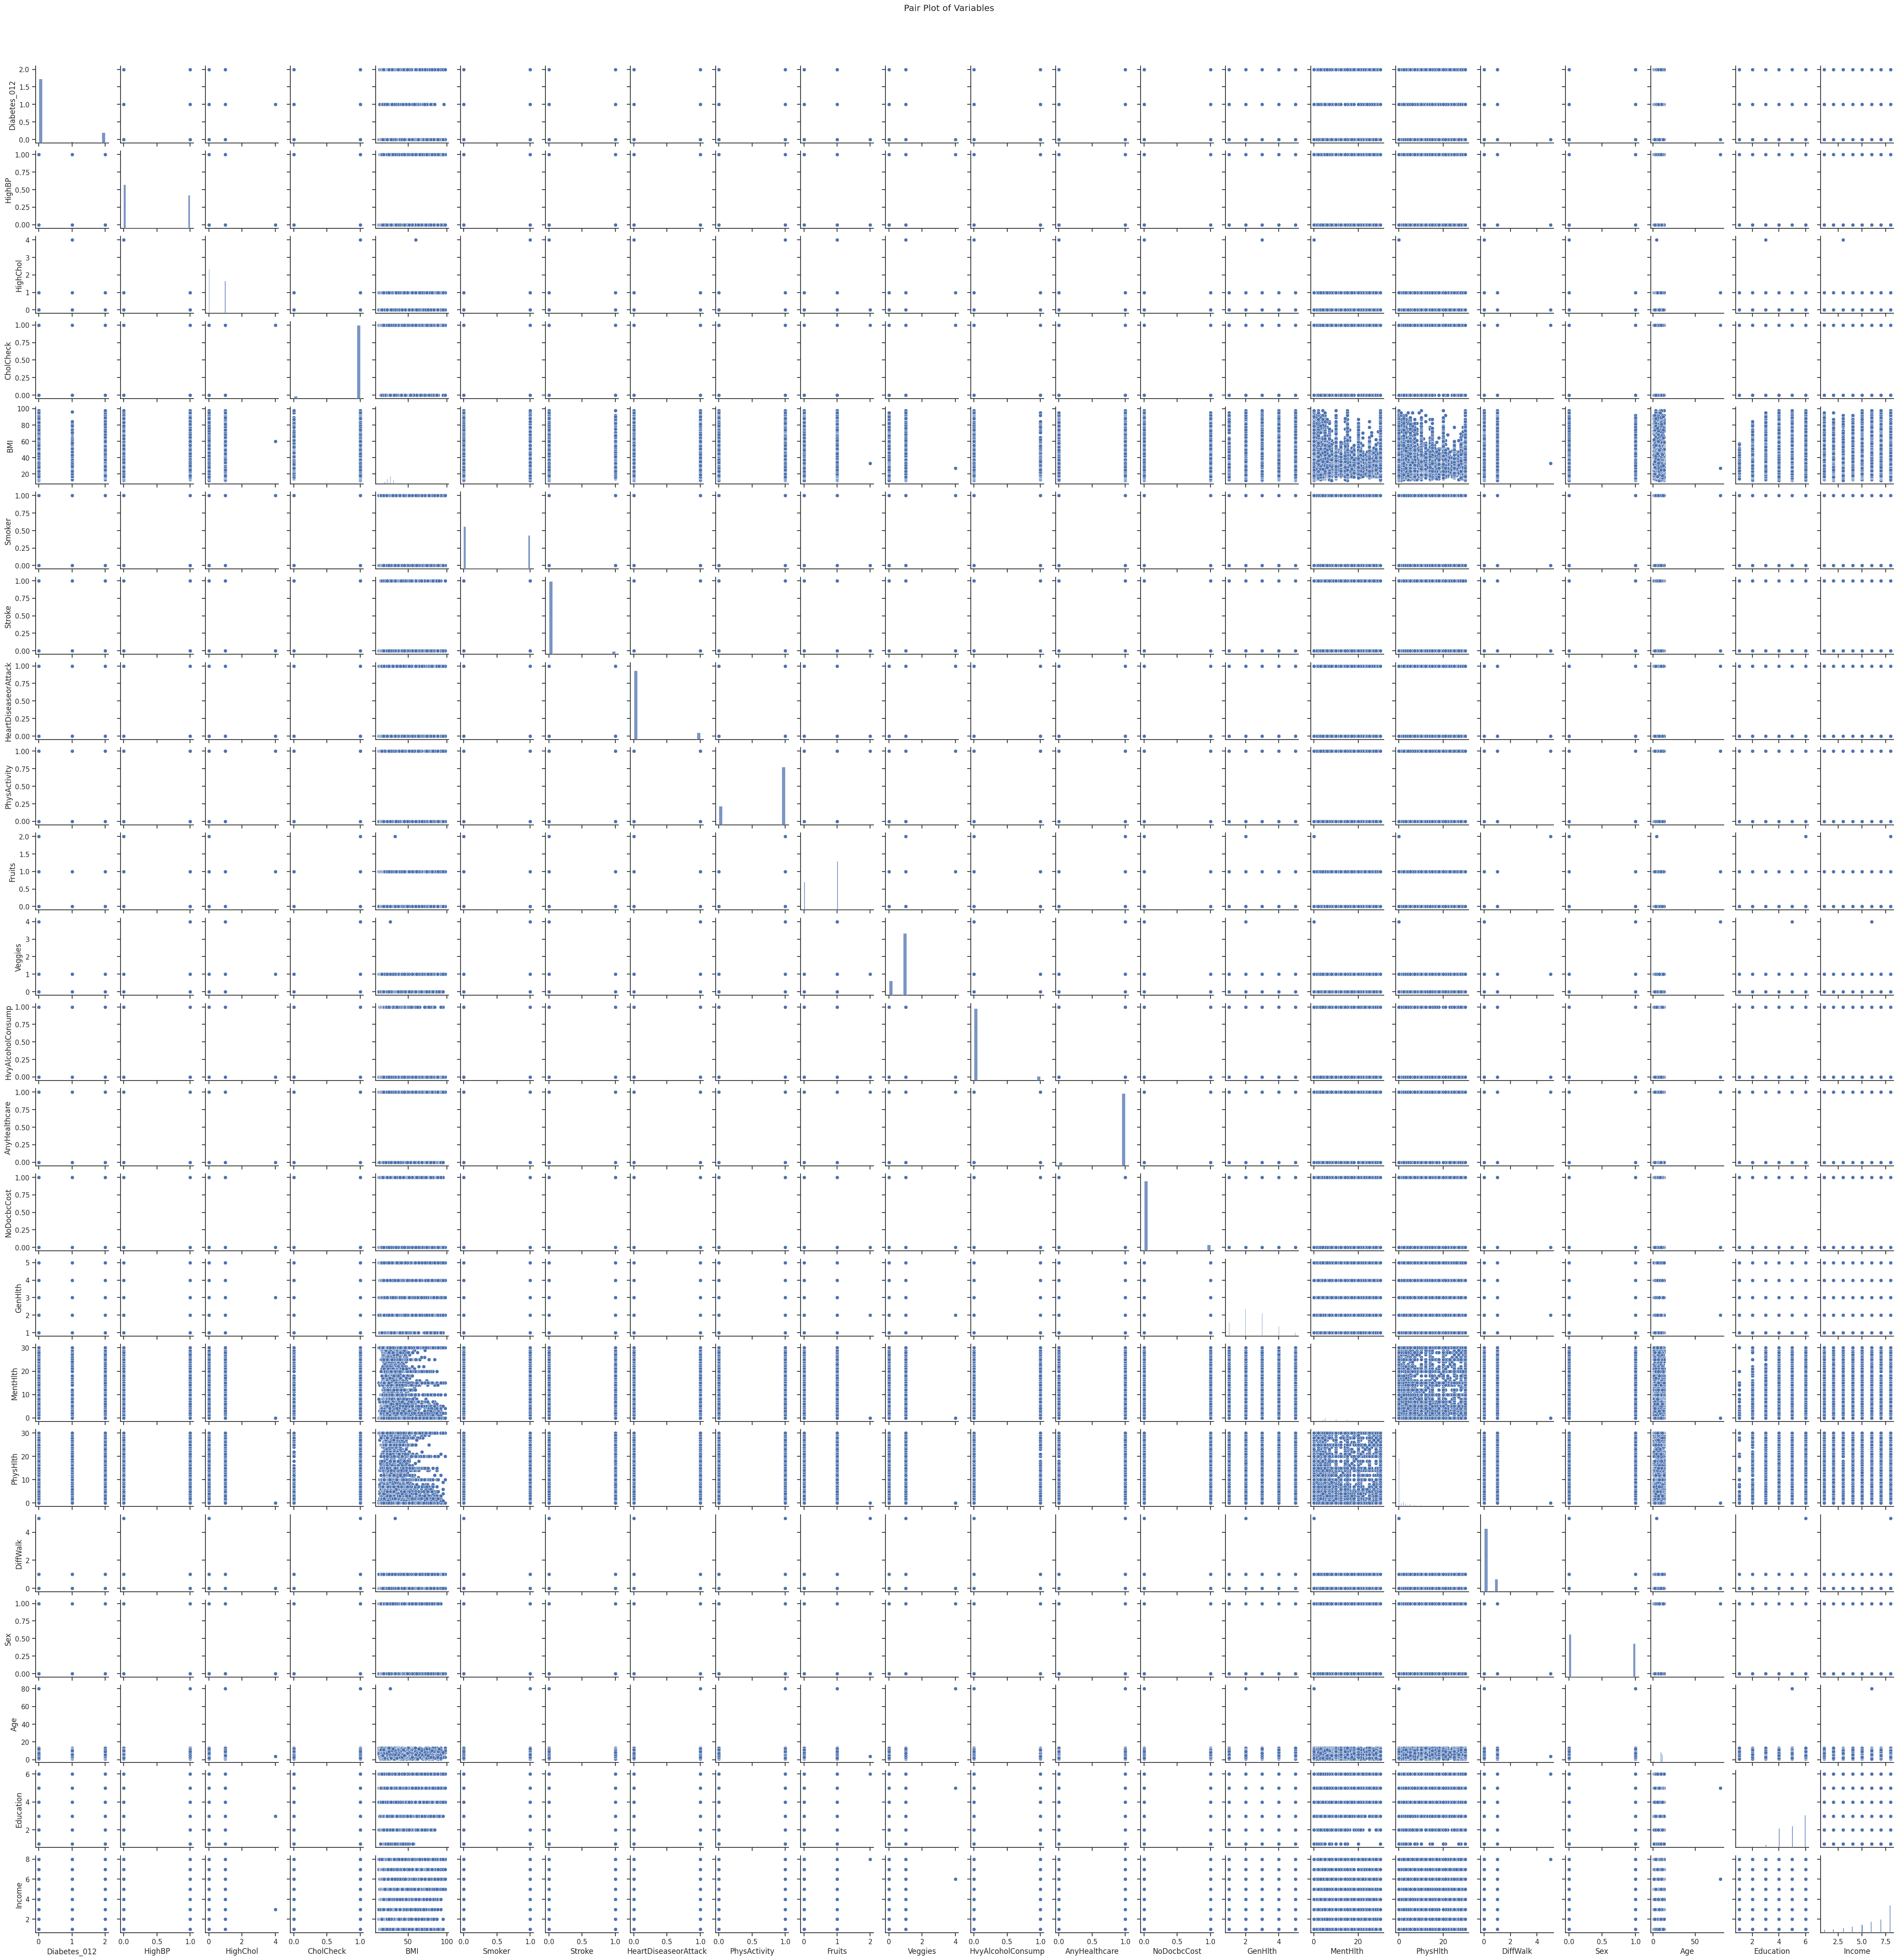

In [3]:
# Create a pair plot for variables
sns.set(style="ticks")
sns.pairplot(df, height=2)
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

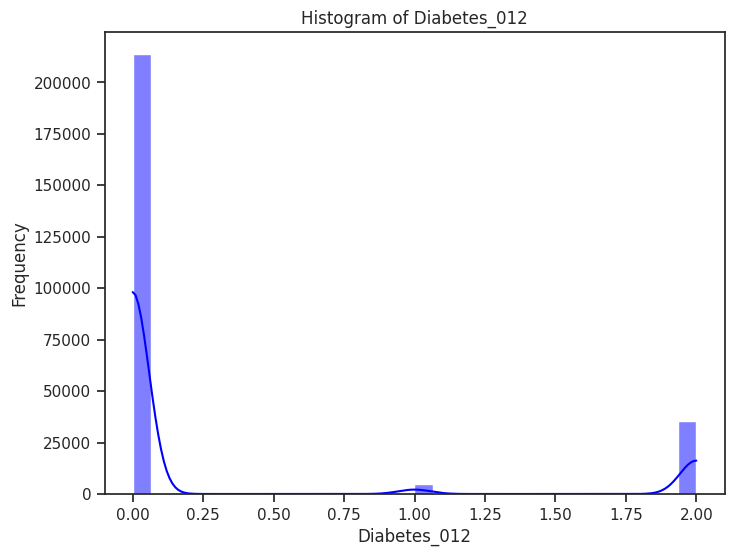

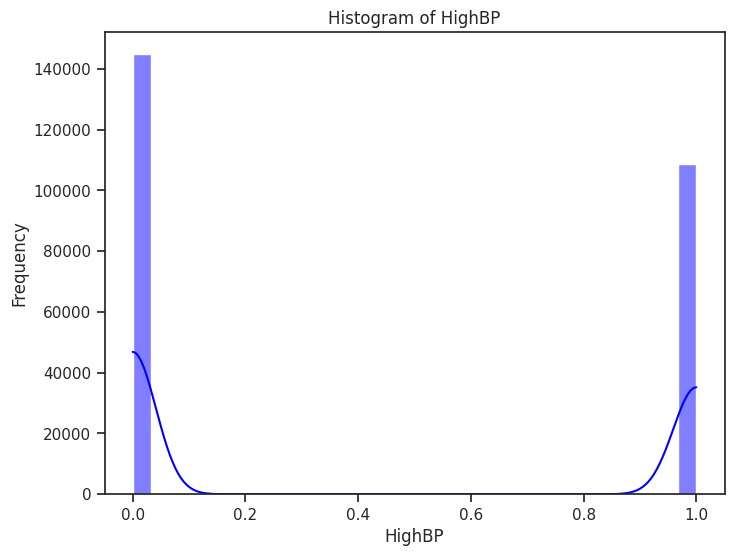

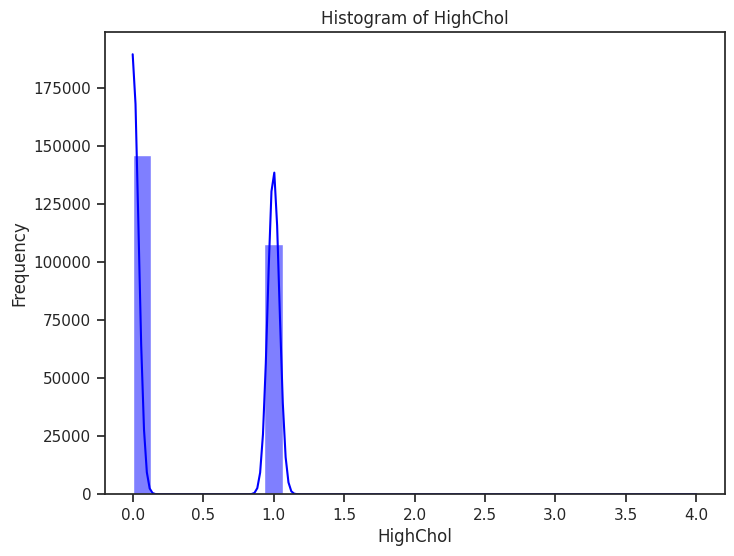

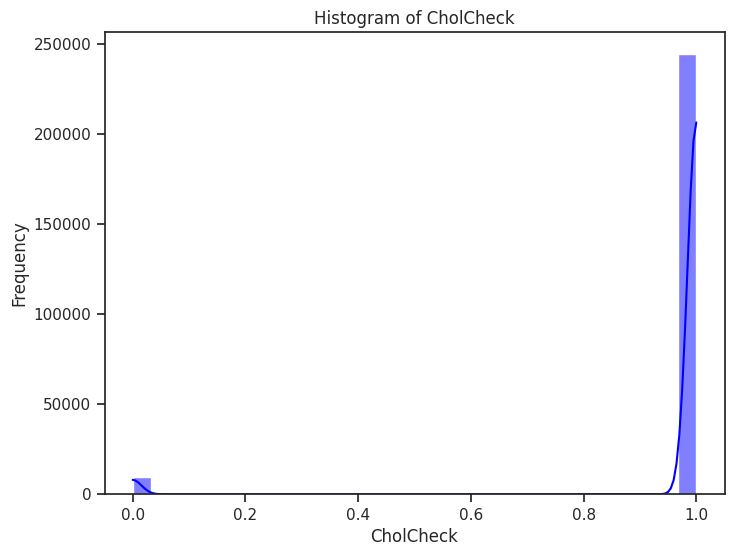

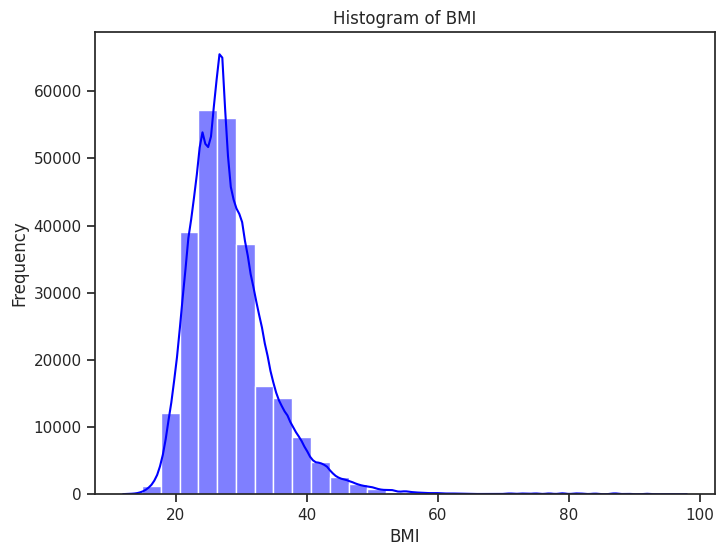

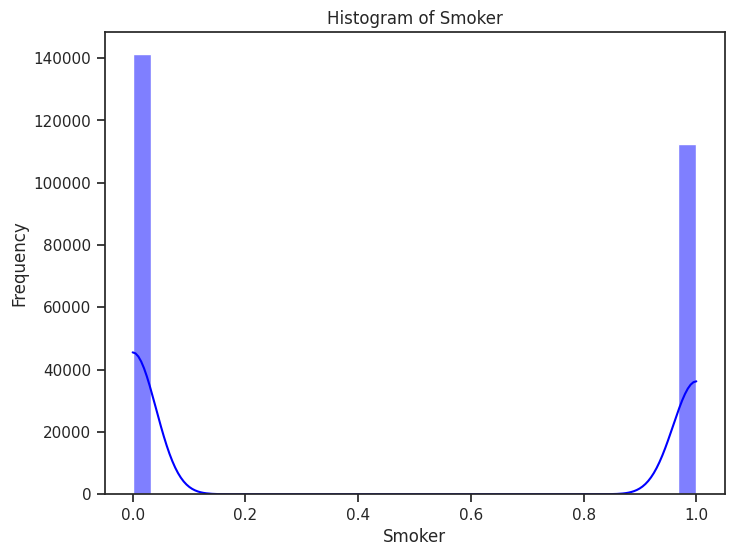

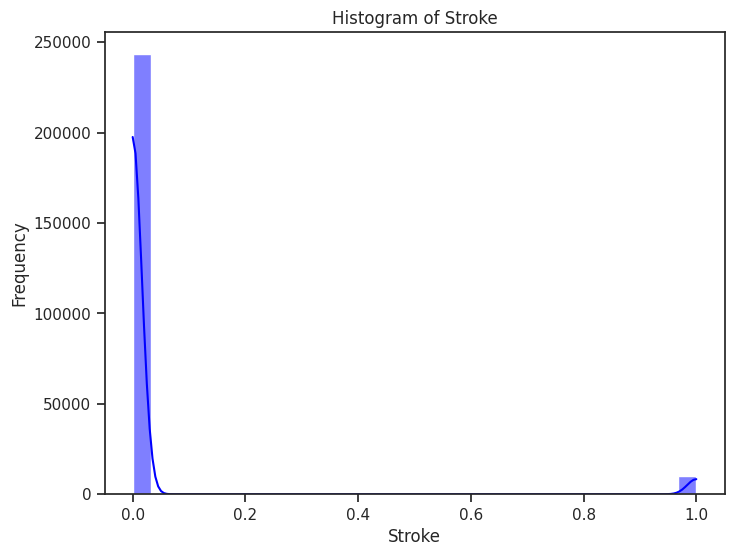

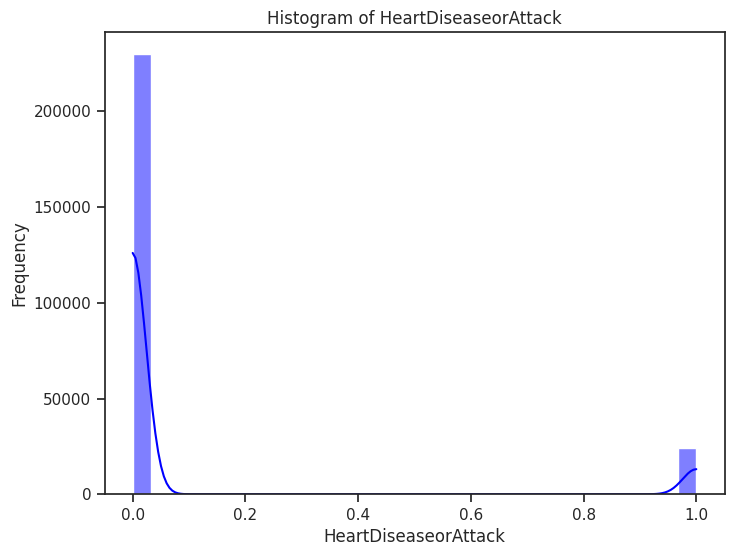

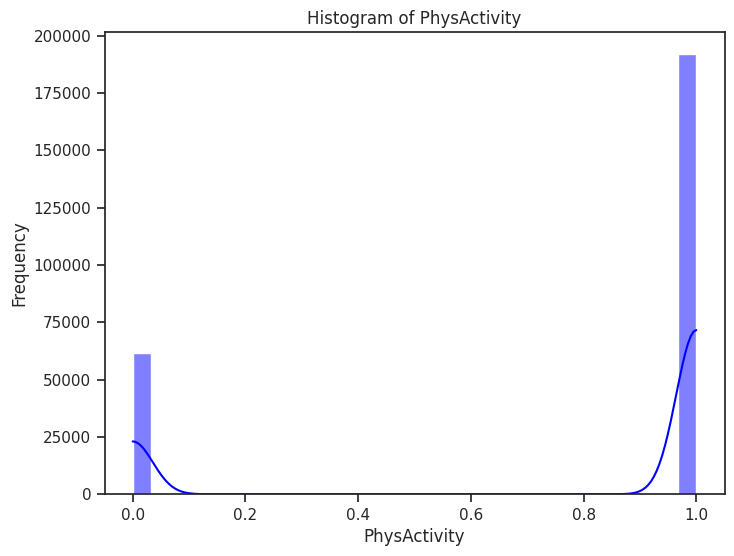

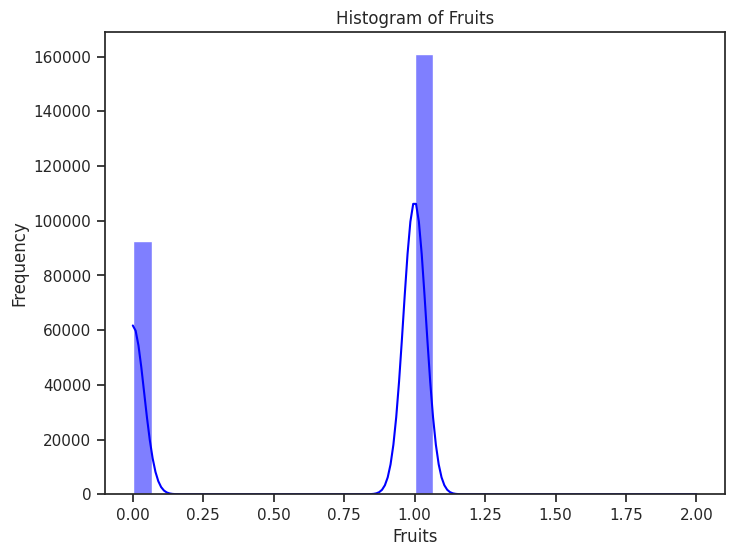

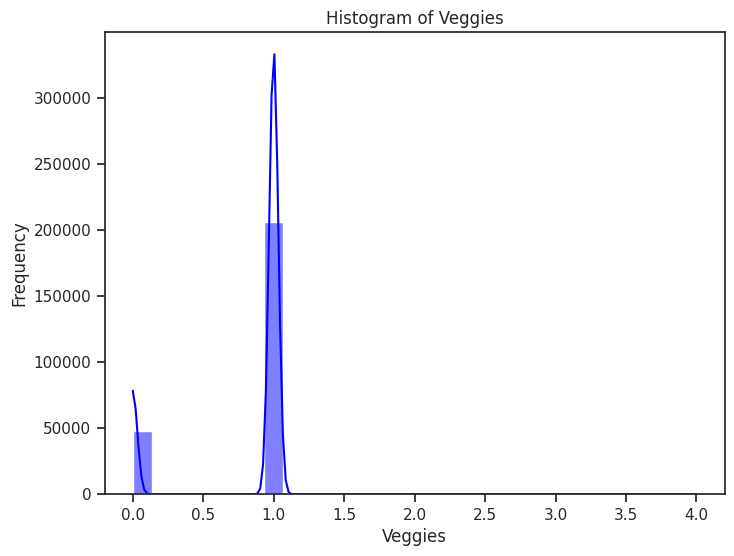

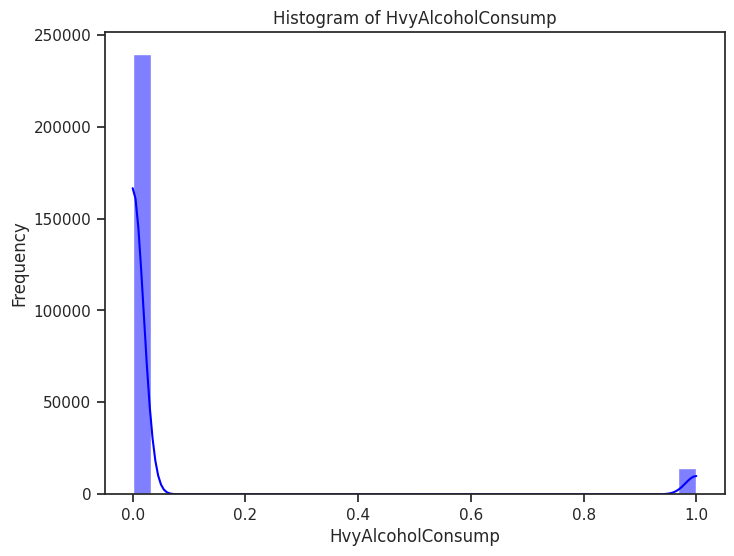

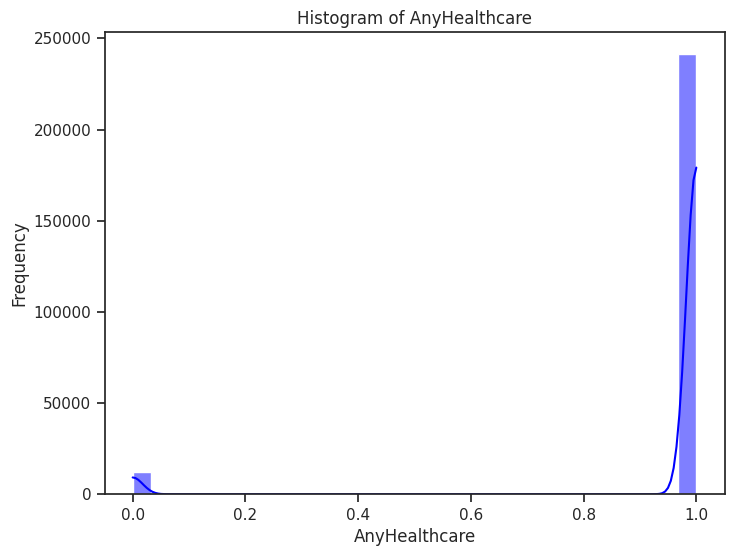

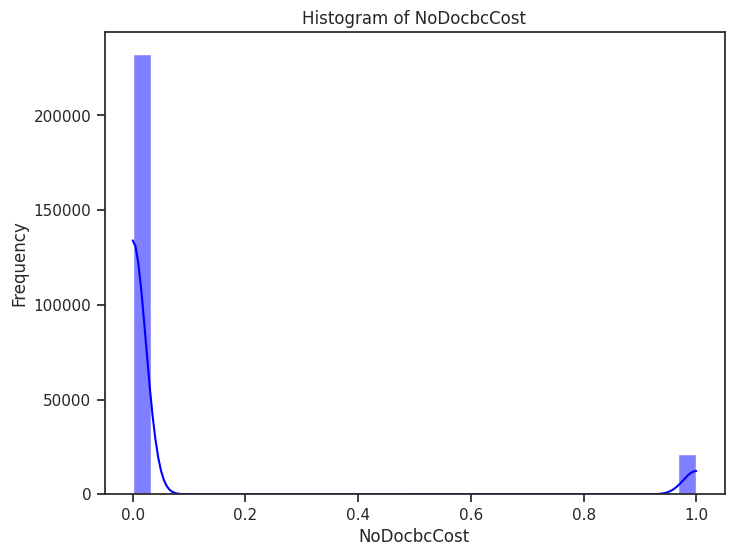

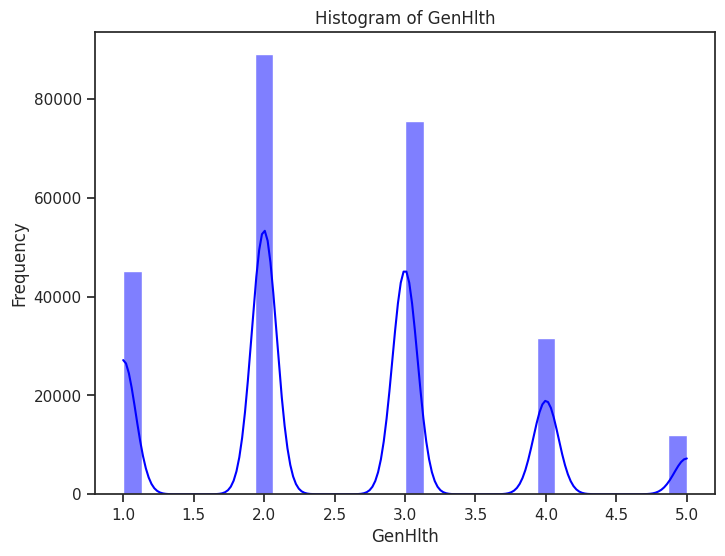

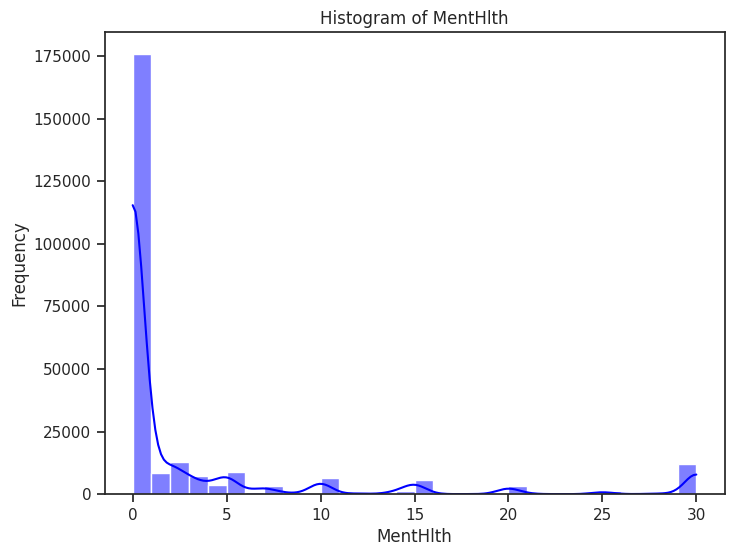

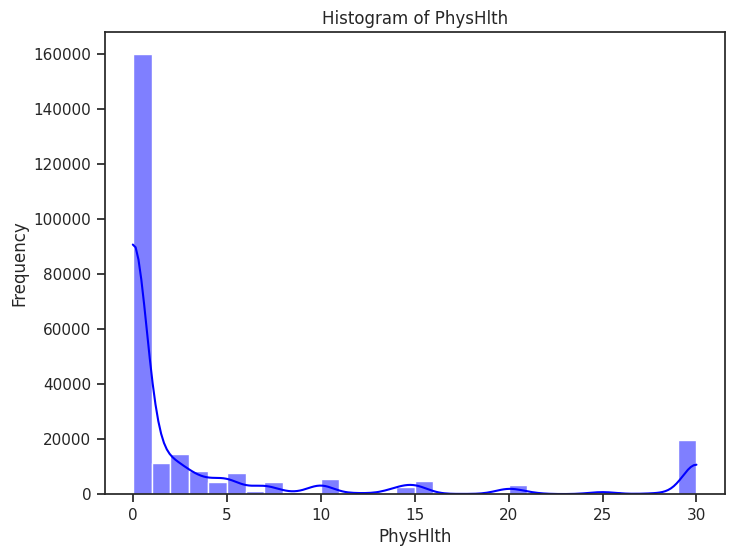

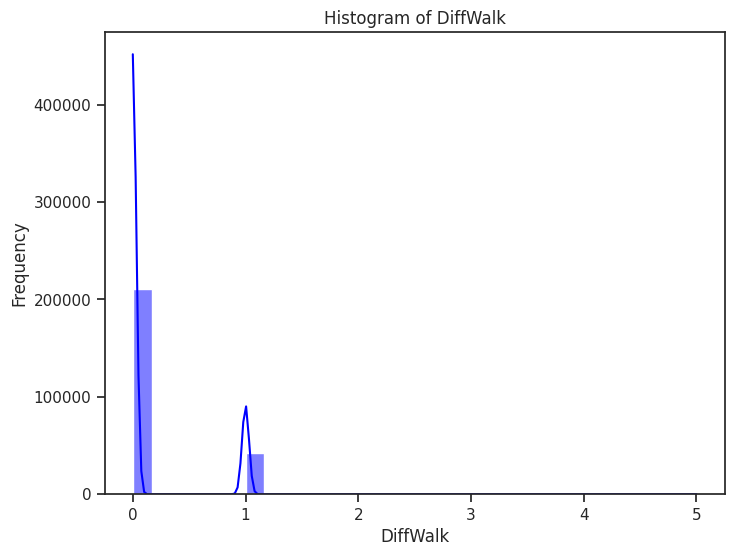

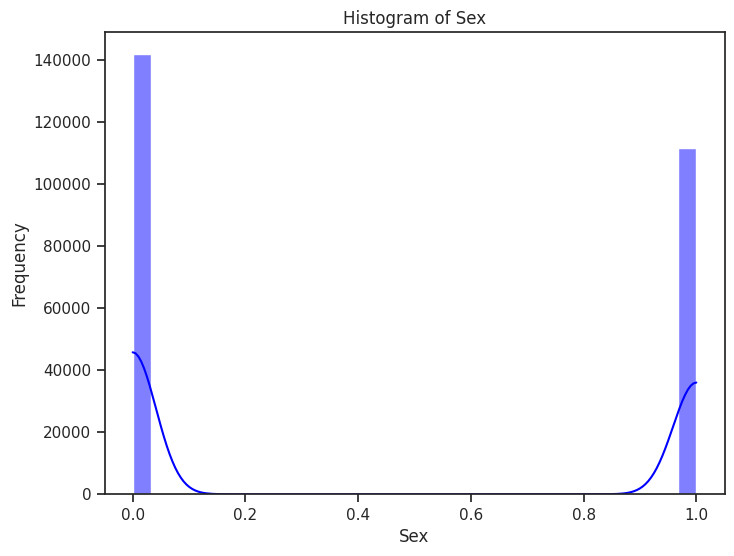

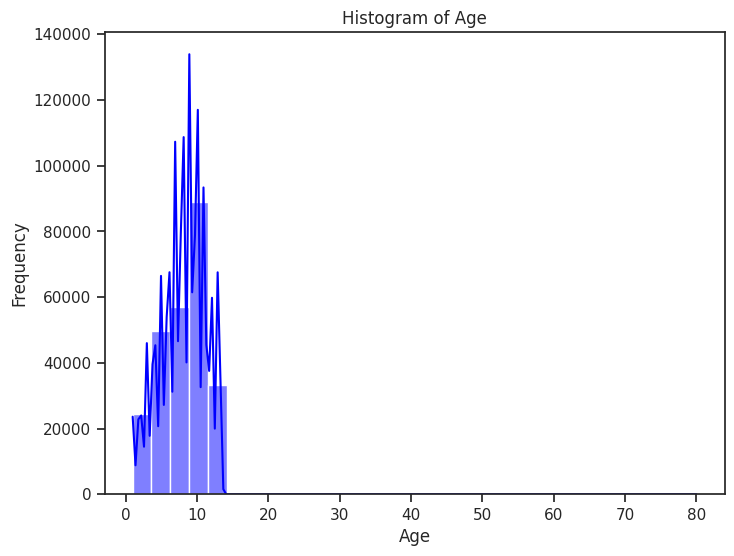

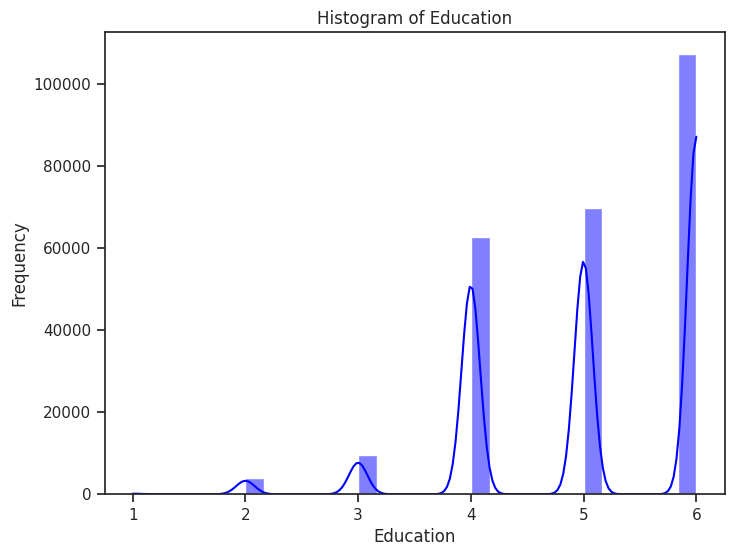

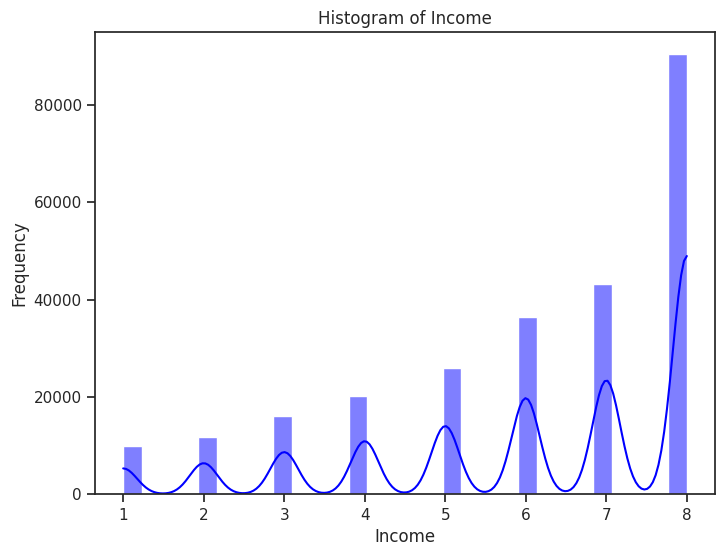

In [4]:
# Construct histograms to illustrate the distribution
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='blue', bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

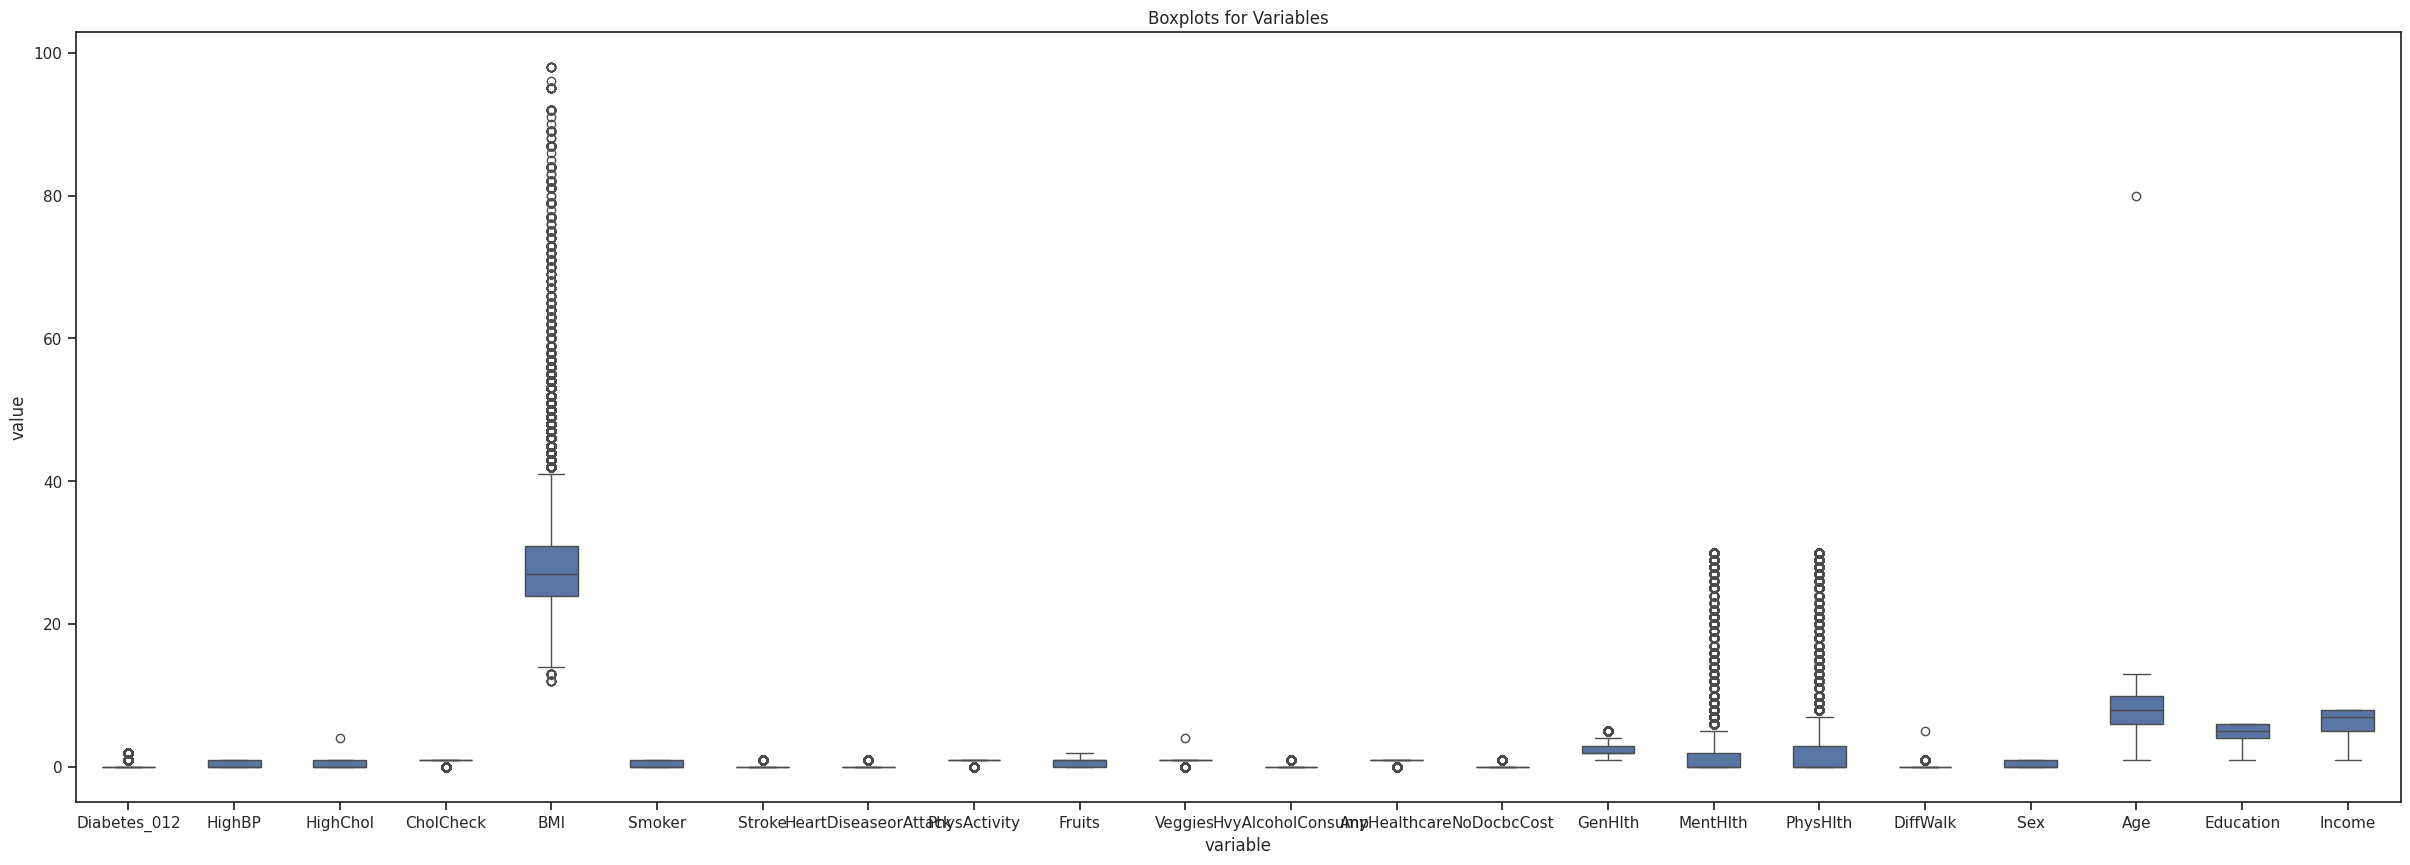

In [5]:
# Create box plot for checking outliers
plt.figure(figsize=(30, 10))
# Create boxplots for each variable
sns.boxplot(x='variable', y='value', data=pd.melt(df), width=0.5)
plt.title('Boxplots for Variables')
plt.show()

### **Data preparation & Feature Engineering**

In [6]:
# Remove duplicate rows
df_no_duplicate = df.drop_duplicates()
df_no_duplicate.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,...,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000
mean,0.325628,0.454440,0.441776,0.959536,28.685818,0.465663,0.044755,0.103219,0.733358,0.612976,...,0.946071,0.092809,2.601147,3.505327,4.675117,0.185526,0.439230,8.086860,4.980564,5.890380
std,0.724620,0.497921,0.496652,0.197045,6.786637,0.498821,0.206766,0.304245,0.442204,0.487079,...,0.225878,0.290165,1.064680,7.713685,9.046524,0.388837,0.496294,3.097447,0.992899,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,4.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,5.000000,1.000000,80.000000,6.000000,8.000000


In [7]:
# Check for missing values
missing_values = df_no_duplicate.isnull().sum()

# Print missing values
print("Missing Values:")
print(missing_values)

Missing Values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [8]:
# Replace the outlier values with the Median of that attribute

import numpy as np

df_no_outliers = df_no_duplicate
column = ['Age', 'BMI', 'MentHlth', 'PhysHlth']

data_outlier = {}
for col in column:
    data_outlier[col] = []
    outliers = 0

# Calculate the max and min thresholds based on the 1.5*IQR formula
    q25 = df_no_outliers[col].quantile(0.25)
    q75 = df_no_outliers[col].quantile(0.75)
    intr_qr = q75 - q25
    max = q75 + (1.5*intr_qr)
    min = q25 - (1.5*intr_qr)

# Discover the outlier values of each attribute and replace them with the median of that attribute
    for x in df_no_outliers[col]:
      if x < min or x > max:
         outliers += 1
         df_no_outliers.loc[df_no_outliers[col] == x, col] = df_no_outliers[col].median()

# Summarize the number of outlier values per attribute as a dictionary
    data_outlier[col].append(outliers)

# Create a dataframe to review the number of outlier values
outliers_list = pd.DataFrame(data_outlier)
outliers_list.head()

/tmp/ipykernel_850/2351841307.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[df_no_outliers[col] == x, col] = df_no_outliers[col].median()
/tmp/ipykernel_850/2351841307.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[df_no_outliers[col] == x, col] = df_no_outliers[col].median()
/tmp/ipykernel_850/2351841307.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[df_no_out

,Age,BMI,MentHlth,PhysHlth
0,1,51,25,20


In [9]:
df_no_outliers.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,...,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000,229784.000000
mean,0.325628,0.454440,0.441776,0.959536,28.050796,0.465663,0.044755,0.103219,0.733358,0.612976,...,0.946071,0.092809,2.601147,0.501645,0.979555,0.185526,0.439230,8.086546,4.980564,5.890380
std,0.724620,0.497921,0.496652,0.197045,5.345880,0.498821,0.206766,0.304245,0.442204,0.487079,...,0.225878,0.290165,1.064680,1.234522,2.169622,0.388837,0.496294,3.093812,0.992899,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,4.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,5.000000,5.000000,10.000000,5.000000,1.000000,13.000000,6.000000,8.000000


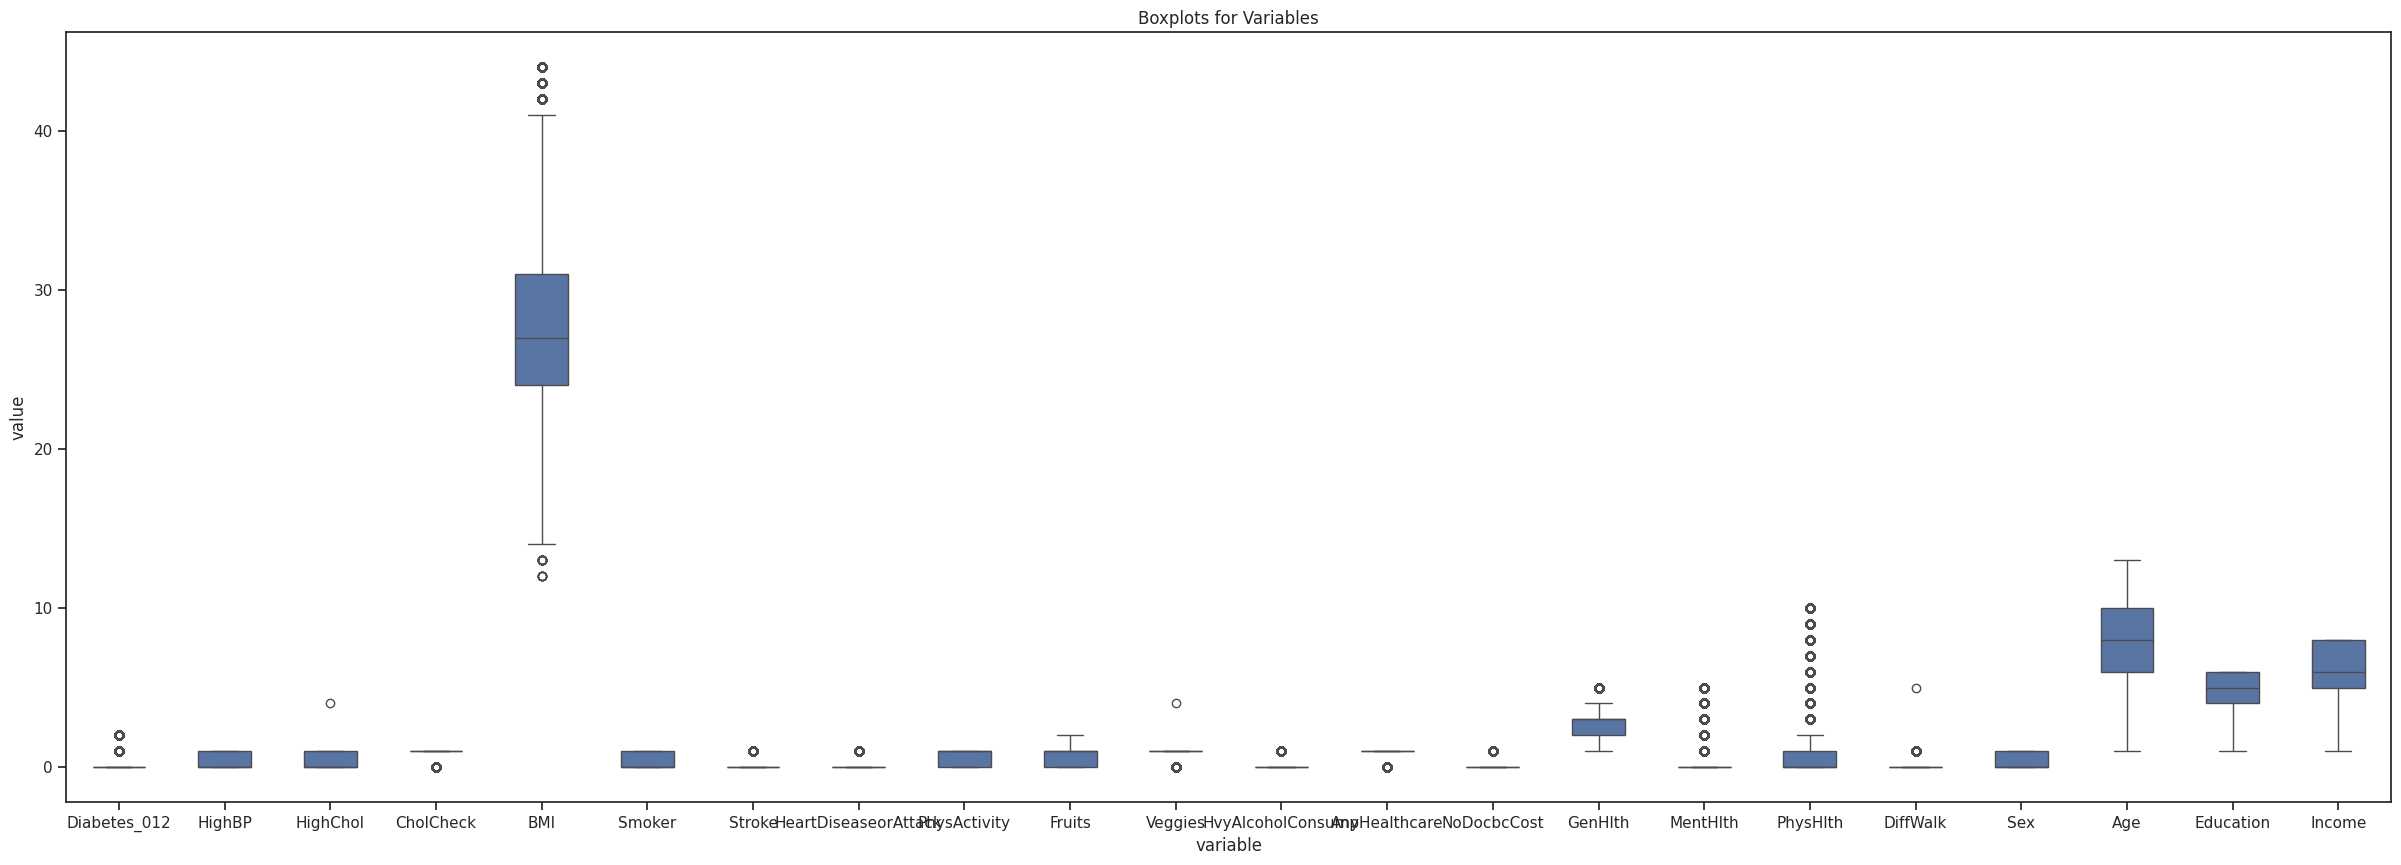

In [10]:
# Create box plot for checking outliers
plt.figure(figsize=(30, 10))
# Create boxplots for each variable
sns.boxplot(x='variable', y='value', data=pd.melt(df_no_outliers), width=0.5)
plt.title('Boxplots for Variables')
plt.show()

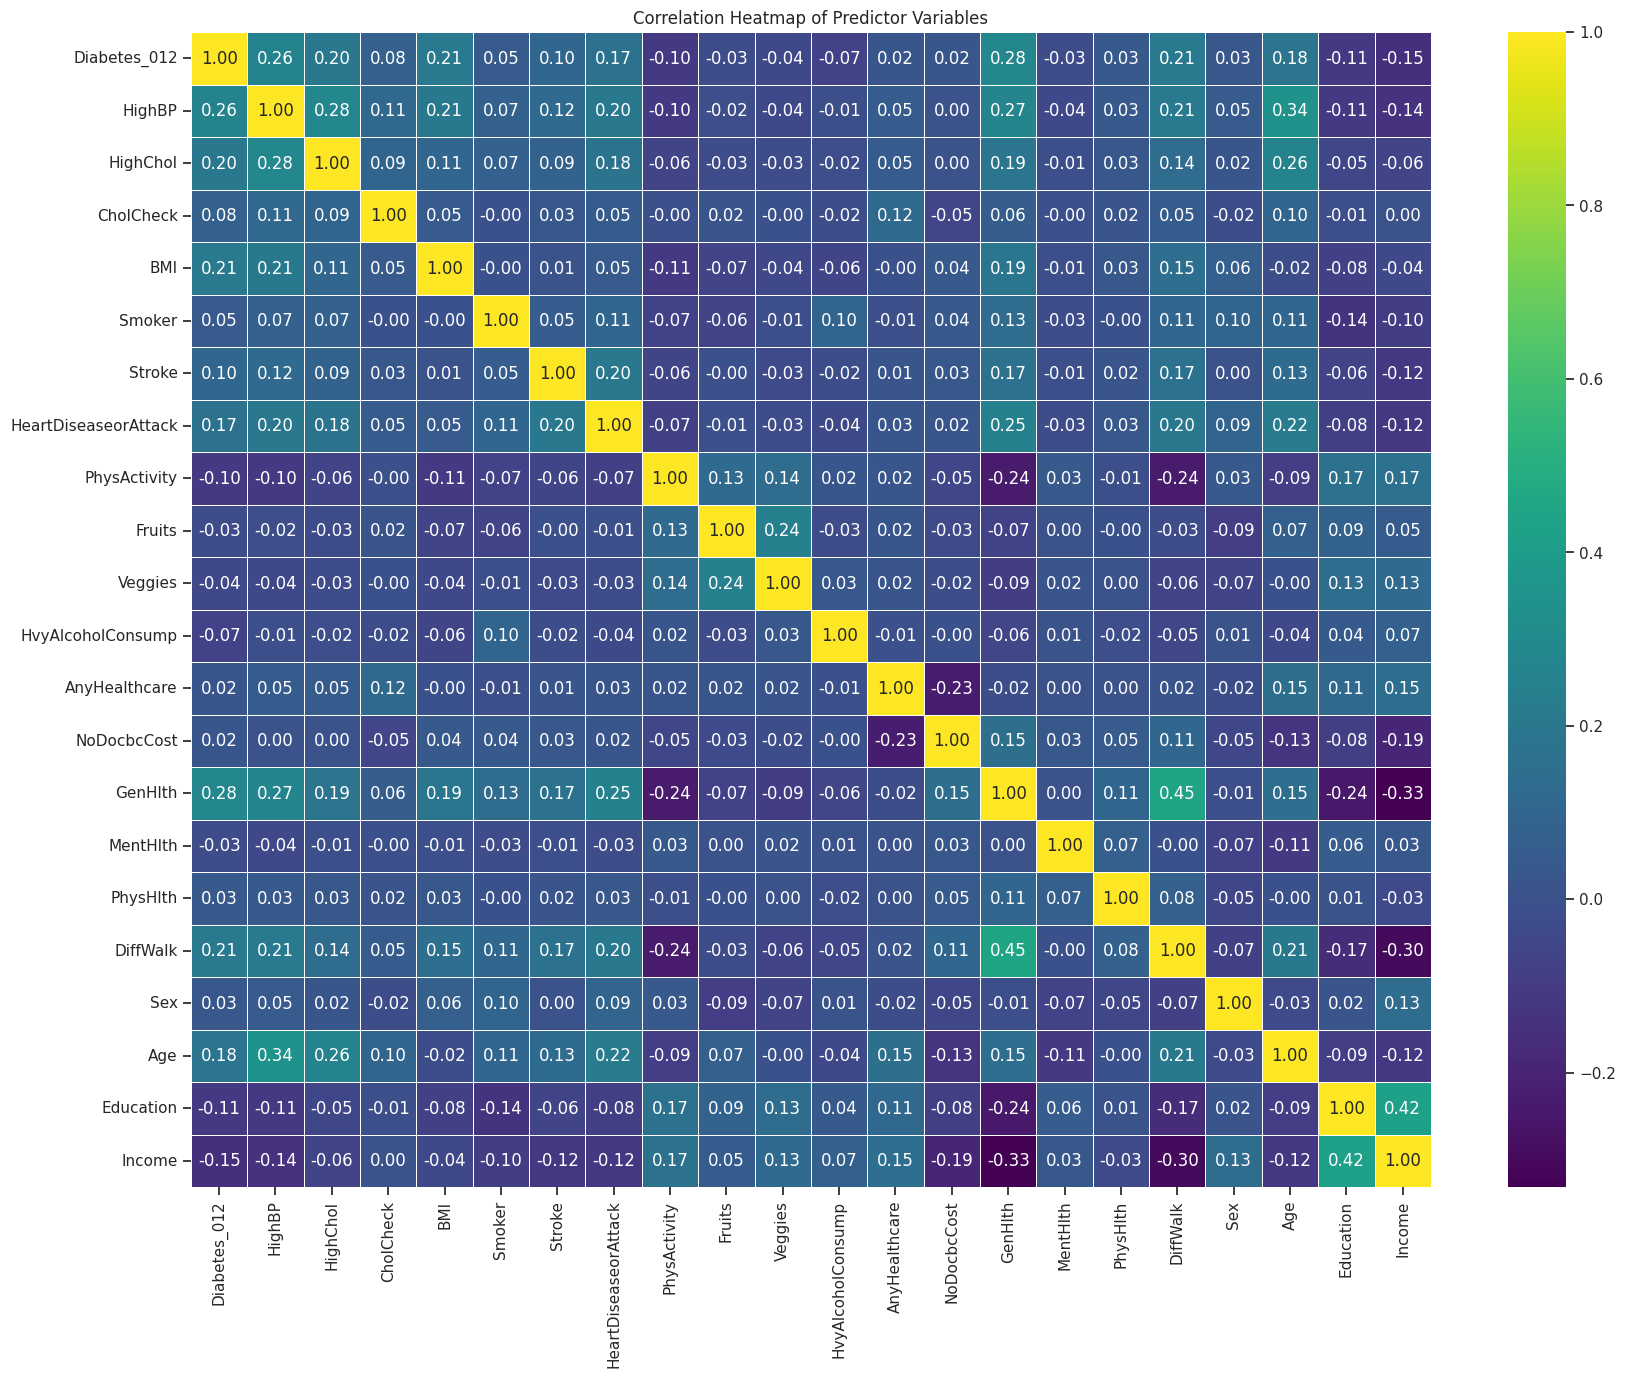

In [11]:
# Calculate the correlation matrix
correlation_matrix = df_no_outliers.corr()
plt.figure(figsize=(20, 15))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

In [14]:
# Print correlation coefficients greater than a certain threshold (e.g., 0.7)
threshold = 0.4
high_correlation_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) for j in range(i+1, len(correlation_matrix.columns)) if abs(correlation_matrix.iloc[i, j]) > threshold]

# Print highly correlated pairs
print("Highly Correlated Variable Pairs:")
for pair in high_correlation_pairs:
    print(f"{correlation_matrix.columns[pair[0]]} - {correlation_matrix.columns[pair[1]]}: {correlation_matrix.iloc[pair[0], pair[1]]}")


Highly Correlated Variable Pairs:
GenHlth - DiffWalk: 0.44655494745103574
Education - Income: 0.4193629123868198


In [ ]:
# Scale the data

#from sklearn.preprocessing import StandardScaler

#for col in df_no_outliers.columns:

# Create an object of the StandardScaler
#  scaler = StandardScaler()

# Fit with the attributes
#  scaler.fit(np.array(df_no_outliers[col]).reshape(-1,1))

# Transform the data
#  df_no_outliers[col] = scaler.transform(np.array(df_no_outliers[col]).reshape(-1,1))

In [15]:
# Using the Variance Inflation Factor (VIF) metric to calculate the correlation matrix of the independent variables.
# Reference: https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF as a function and save in a dataframe
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# Call the attributes of the dataset
X = df_no_outliers.iloc[:,:-1]

# Review the result
calc_vif(X)

,variables,VIF
0,Diabetes_012,1.417977
1,HighBP,2.379607
2,HighChol,2.084249
3,CholCheck,21.769207
4,BMI,23.751877
5,Smoker,1.981446
6,Stroke,1.125720
7,HeartDiseaseorAttack,1.299284
8,PhysActivity,4.127088
9,Fruits,2.826779


### **Modeling & Evaluation**

In [16]:
# Select the first column as the target column
target_column = df_no_outliers.columns[0]
target = df_no_outliers[target_column]

# Select the rest of the columns as features
features = df_no_outliers.drop(target_column, axis=1)

In [17]:
# Split dataset into train (80%) and test (20%) based on "target" and "features"

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [18]:
# Build predictive models to determine the "target" using the following techniques: K-Nearest Neighbor Regressor, Random Forest, and XGBoost

# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

boruta_columns = ['HighBP','HighChol','BMI','HeartDiseaseorAttack','HvyAlcoholConsump','GenHlth','DiffWalk','Sex','Age','Income']

# Create a dictionary of models
models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    y_pred = []
    model.fit(X_train[boruta_columns], y_train)
    y_pred = model.predict(X_test[boruta_columns])
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Print the results
print('Model Evaluation Results:')
for model_name, metrics in results.items():
    print(f'{model_name}:')
    print(f'Mean Squared Error (MSE): {metrics["MSE"]:.2f}')
    print(f'Mean Absolute Error (MSE): {metrics["MAE"]:.2f}')
    print(f'R-Squared (R2): {metrics["R2"]:.2f}')
    print()


Model Evaluation Results:
KNeighborsRegressor:
Mean Squared Error (MSE): 0.51
Mean Absolute Error (MSE): 0.44
R-Squared (R2): 0.03

RandomForestRegressor:
Mean Squared Error (MSE): 0.52
Mean Absolute Error (MSE): 0.45
R-Squared (R2): 0.01

XGBRegressor:
Mean Squared Error (MSE): 0.43
Mean Absolute Error (MSE): 0.44
R-Squared (R2): 0.18



In [19]:
# Perform Naïve Bayes Classification, and evaluate the performance

# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train[boruta_columns], y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test[boruta_columns])

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Classification Report:')
print(report)


Accuracy: 0.7724176948016624
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     38027
           1       0.00      0.00      0.00       972
           2       0.36      0.54      0.43      6958

    accuracy                           0.77     45957
   macro avg       0.42      0.46      0.43     45957
weighted avg       0.79      0.77      0.78     45957



/home/momi75/miniconda3/envs/bmg5109/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/momi75/miniconda3/envs/bmg5109/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/momi75/miniconda3/envs/bmg5109/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

**Deep Learning Model Evaluation**

In [21]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Standardize your numeric features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=3)  # 3 classes
y_test_one_hot = to_categorical(y_test, num_classes=3)

2024-03-31 22:18:51.828085: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-31 22:18:51.829434: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 22:18:51.853262: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 22:18:51.895857: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 22:18:52.545056: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, F1Score

# Define the model
model = Sequential()

# Add an input layer
model.add(Dense(64, activation='relu', input_shape=(21,)))

# Add a dropout layer
model.add(Dropout(0.5))

# Add another hidden layer
model.add(Dense(64, activation='relu'))

# Add an output layer with softmax activation (3 classes)
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical cross-entropy loss, Adam optimizer, and additional metrics
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy', Precision(), Recall(), F1Score()])

# Print the model summary
model.summary()

/home/momi75/miniconda3/envs/bmg5109/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,763 (22.51 KB)

 Trainable params: 5,763 (22.51 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Specify the number of epochs and batch size
epochs = 10  # Example: Train for 10 epochs
batch_size = 32  # Example: Use a batch size of 32

# Train the model
history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_scaled, y_test_one_hot))

# Print the training history
print(history.history)

Epoch 1/10
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8261 - f1_score: 0.3539 - loss: 0.4601 - precision: 0.8331 - recall: 0.8141 - val_accuracy: 0.8281 - val_f1_score: 0.3060 - val_loss: 0.4363 - val_precision: 0.8310 - val_recall: 0.8244
Epoch 2/10
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8314 - f1_score: 0.3676 - loss: 0.4353 - precision: 0.8370 - recall: 0.8232 - val_accuracy: 0.8310 - val_f1_score: 0.3386 - val_loss: 0.4331 - val_precision: 0.8364 - val_recall: 0.8231
Epoch 3/10
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8302 - f1_score: 0.3748 - loss: 0.4351 - precision: 0.8365 - recall: 0.8215 - val_accuracy: 0.8316 - val_f1_score: 0.3535 - val_loss: 0.4314 - val_precision: 0.8378 - val_recall: 0.8231
Epoch 4/10
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8330 - f1_score: 0.3823 - loss: 0.4286 - precision: 0.8389 - recall: 0.8244 - val_accuracy: 0.8310 - val_f1_score: 0.3392 - val_loss: 0.4334 - val_precision: 0.8350 -

In [24]:
model.save("trained_model.h5")

In [26]:
# New code to find and print the highest values of the metrics
max_val_accuracy_index = np.argmax(history.history['val_accuracy'])
max_val_precision_index = np.argmax(history.history['val_precision'])
max_val_recall_index = np.argmax(history.history['val_recall'])

print(f"Best accuracy: {history.history['val_accuracy'][max_val_accuracy_index]} at epoch {max_val_accuracy_index + 1}")
print(f"Best precision: {history.history['val_precision'][max_val_precision_index]} at epoch {max_val_precision_index + 1}")
print(f"Best recall: {history.history['val_recall'][max_val_recall_index]} at epoch {max_val_recall_index + 1}")

# For F1 score, we need to handle it differently since it's a list of tensors
f1_scores_per_class = tf.stack(history.history['val_f1_score'])  # Stack the tensors
f1_scores_per_class = f1_scores_per_class.numpy()  # Convert to numpy array

# Find the maximum F1 score for each class
max_f1_class_0 = np.max(f1_scores_per_class[:, 0])
max_f1_class_1 = np.max(f1_scores_per_class[:, 1])
max_f1_class_2 = np.max(f1_scores_per_class[:, 2])

print(f"Best F1 score for class 0: {max_f1_class_0}")
print(f"Best F1 score for class 1: {max_f1_class_1}")
print(f"Best F1 score for class 2: {max_f1_class_2}")

Best accuracy: 0.8316469788551331 at epoch 3
Best precision: 0.8377959132194519 at epoch 3
Best recall: 0.8272080421447754 at epoch 9
Best F1 score for class 0: 0.9070712327957153
Best F1 score for class 1: 0.0
Best F1 score for class 2: 0.15344373881816864
